# Notes sur l'évaluation statistique d'une incertitude (type A)

L'objectif de ces notes est de donner quelques précisions sur l'évaluation statistique d'une incertitude à partir d'un échantillon de mesures simulées et réels. Nous verrons l'effet du théorème de la lumite centrale sur l'incertitude d'une valeur moyenne pour des données non corrélées et corrélées.


# Données non corrélées

## Génération des données
Nous allons simuler un échantillon de 50000 valeurs de moyenne $\mu$ suivant une statistique gaussienne d'ecart type $\sigma$ au moyen de la librairie \textit{stats} de \textit{scipy}.

299.6940811315145
0.05809356238363168


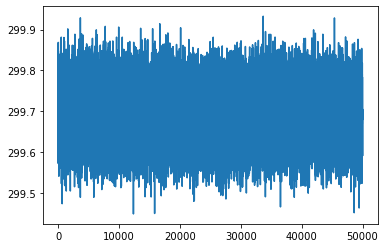

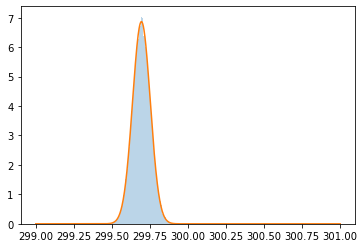

In [6]:
# Librairies
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import scipy.special


#Paramètre du tirage
N = 50000
sig = 0.05787
mu = 299.6938

Alea = stats.norm.rvs(size = N, loc = 0, scale = sig) #bruit gaussien d'écart type sig
DATA = mu + Alea #valeur centrale mu entachée d'une erreur aléatoire

print(np.mean(DATA))
print(np.std(DATA, ddof=1))

# tracé des données
plt.figure(0)
plt.plot(DATA)

plt.figure(1)
plt.hist(DATA, bins=100, histtype="stepfilled", alpha=0.3, density=True)
F_fit = np.linspace(299.0,301,1000)
pdf = stats.norm(np.mean(DATA), np.std(DATA)).pdf(F_fit)
plt.plot(F_fit, pdf)

## Méthode d'analyse
L'analyse de données consiste ici à tirer deux informations :
* la valeur du paramètre physique d'où est issue cette mesure.
* l'incertitude associé à cette valeur au travers du processus de mesure

L'obtention de ces deux informations necessite de connaitre les paramètres $\mu$ et $\sigma$ défini plus haut. Tout l'enjeu de l'analyse de données consiste donc à "deviner", inférer ces paramètres à partir d'outils statistiques. Le cours de statistique nous renseigne sur le fait que les meilleurs estimateurs pour ces deux paramètres sont respectivement : 
* la valeur moyenne des données
* l'estimateur de l'ecart type à un degrés de liberté, encore appelé écart type expérimentale : $\sigma_{N-1}$

L'incertitude est associée à un intervalle de confiance correspondant à la probabilité qu'une mesure soit comprise dans un intervalle donné.

* facteurs d'elargissement
* intervalle 

## Résultats




# Statistique de la valeur moyenne

## Mesure à variable aléatoire
* TLC

## Résultats

299.6940800612921
0.029092426984398005


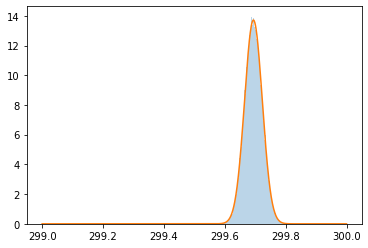

In [7]:
Nmoy = 4 #Nombre de points dans le processus de moyennage
DATA2 = []
for i in range(len(DATA)): #for i in range(0,len(DATA),Nmoy):
    DATA2.append(np.mean(DATA[i:i+Nmoy]))
    
    
print(np.mean(DATA2))
print(np.std(DATA2))

# tracé de la statistique de la valeur moyenne
plt.figure(2)
plt.hist(DATA2, bins=100, histtype="stepfilled", alpha=0.3, density=True)
F_fit = np.linspace(299.0,300,1000)
pdf = stats.norm(np.mean(DATA2), np.std(DATA2)).pdf(F_fit)
plt.plot(F_fit, pdf)

299.6940765921837
0.014643207609785755


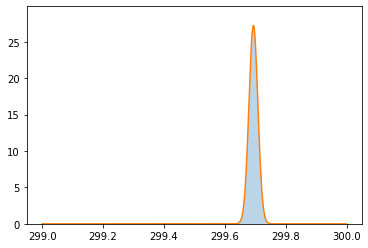

In [8]:
Nmoy = 16 #Nombre de points dans le processus de moyennage
DATA2 = []
for i in range(len(DATA)): #for i in range(0,len(DATA),Nmoy):
    DATA2.append(np.mean(DATA[i:i+Nmoy]))
    
    
print(np.mean(DATA2))
print(np.std(DATA2))

# tracé de la statistique de la valeur moyenne
plt.figure(2)
plt.hist(DATA2, bins=100, histtype="stepfilled", alpha=0.3, density=True)
F_fit = np.linspace(299.0,300,1000)
pdf = stats.norm(np.mean(DATA2), np.std(DATA2)).pdf(F_fit)
plt.plot(F_fit, pdf)

* La moyenne suit bien une statistique aléatoire dont l'écart type dépend du nombre de points dans la moyenne

# Données corrélées

## Génération des données
Nous alons utiliser un processus proche du précédent à ceci prés que la valeur du paramètre physique va subir une dérive thermique périodique.

299.70598170260826
0.2136098280302165


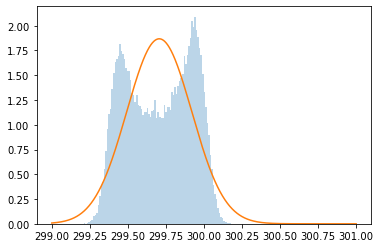

In [9]:
Alea = stats.norm.rvs(size = N, loc = mu, scale = sig)
BaseTemps = np.linspace(0,N,N)

DATA = 5*sig*np.sin(40*BaseTemps/N) + Alea

print(np.mean(DATA))
print(np.std(DATA))

# tracé de la statistique des données : 
plt.figure(2)
plt.hist(DATA, bins=100, histtype="stepfilled", alpha=0.3, density=True)
F_fit = np.linspace(299.0,301,1000)
pdf = stats.norm(np.mean(DATA), np.std(DATA)).pdf(F_fit)
plt.plot(F_fit, pdf)